https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/


In [ ]:
!pip install yfinance

In [ ]:
!pip install mpl_finance

In [ ]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [ ]:
name = 'SPY'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15",end="2020-07-15")



In [ ]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [ ]:
df

,Date,Open,High,Low,Close
Date,,,,,
2020-03-16,737500.0,238.72,254.28,234.94,237.40
2020-03-17,737501.0,242.54,253.56,234.65,250.22
2020-03-18,737502.0,233.84,245.84,225.69,237.55
2020-03-19,737503.0,236.81,244.86,229.85,238.06
2020-03-20,737504.0,241.47,243.40,227.50,227.80
...,...,...,...,...,...
2020-07-08,737614.0,314.61,316.30,312.70,316.18
2020-07-09,737615.0,316.84,317.10,310.68,314.38
2020-07-10,737616.0,314.31,317.88,312.76,317.59


In [ ]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [ ]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))


In [1]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

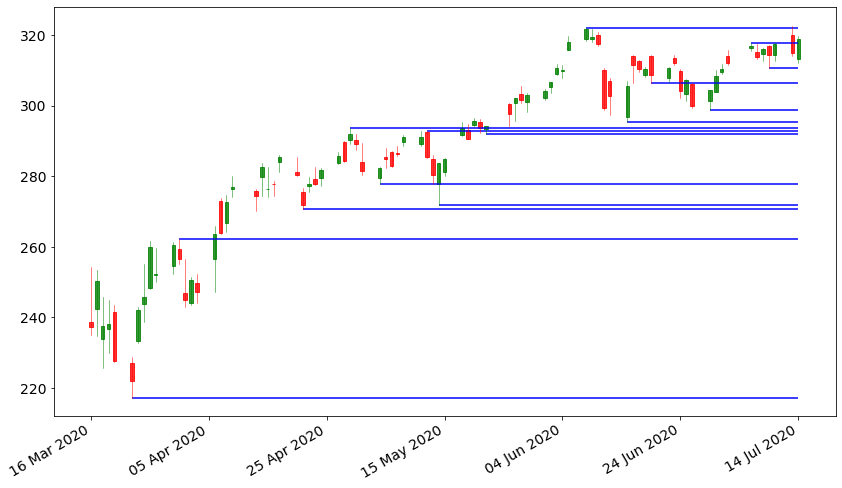

In [ ]:
plot_all()

In [ ]:
s =  np.mean(df['High'] - df['Low'])

In [ ]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [ ]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))
    

In [ ]:
levels

[(5, 217.3),
 (11, 262.18),
 (25, 270.83),
 (31, 293.59),
 (58, 321.99),
 (67, 306.53)]

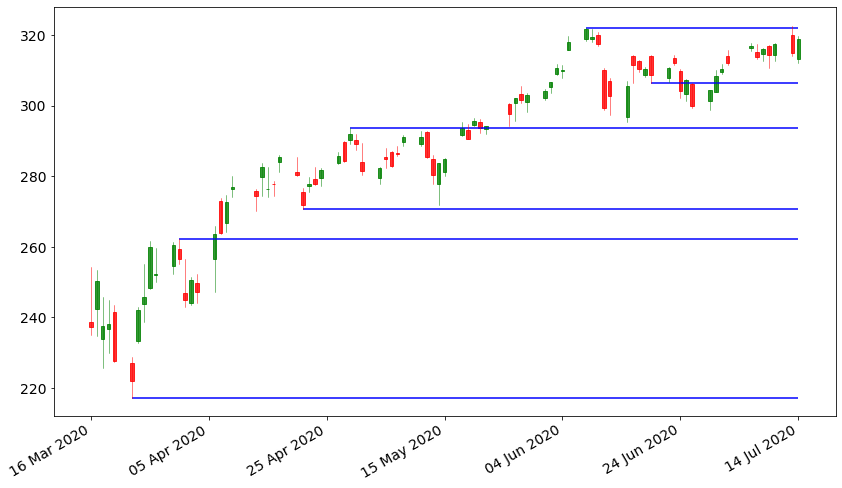

In [ ]:
plot_all()